#Regressão linear

###Criação e análise de regressão linear simples e múltipla



Fonte: https://medium.com/better-programming/data-science-modeling-how-to-use-linear-regression-with-python-fdf6ca5481be

Base: https://www.kaggle.com/crawford/80-cereals

Atributos:

- Name: nome do cereal
- mfr: Fabricante
  - A = American Home Food Products;
  - G = General Mills
  - K = Kelloggs
  - N = Nabisco
  - P = Post
  - Q = Quaker Oats
  - R = Ralston Purina
- type:
  - C = cold
  - H = hot
- calories: calorias por porção
- protein: gramas de proteína
- fat: gramas de gordura
- sodium: miligramas de sódio
- fiber: gramas de fibras dietéticas
- carbo: gramas de carboidratos complexos
- sugars: gramas de açúcares
- potass: miligramas de potássio
- vitamins: vitaminas e minerais - 0, 25, ou 100, indicando a porcentagem típica de recomendação da FDA.
- shelf: prateleira de exibição (1, 2 ou 3, contando a partir do chão)
- weight: peso em onças (1 onça = 28 gramas) de uma porção
- cups: número de xícaras em uma porção
- rating: uma classificação dos cereais (possivelmente de relatórios do consumidor?)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from scipy.stats import shapiro
import seaborn as sns;

sns.set(style="ticks", color_codes=True)


In [ ]:

from google.colab import files
uploaded = files.upload()

cereal = pd.read_csv("cereal.csv")

Saving cereal.csv to cereal (1).csv


#EXPLORAÇÃO DOS DADOS

In [ ]:
def teste_normalidade(dados):
  stat, p = shapiro(dados)
  print('Estatística=%.3f, p-valor=%.3f' % (stat, p))
  alpha = 0.05
  if p > alpha:
      print('A amostra parece ser normal (não podemos rejeitar H0)')
  else:
      print('A amostra não parece ser normal (rejeitamos H0)')


In [ ]:
cereal.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [ ]:
cereal.columns = ['Nome', 'Fabricante', 'Tipo', 'Calorias', 'Proteínas', 'Gorduras', 'Sódio', 'Fibras',
                  'Carboidratos', 'Açúcares', 'Potássio', 'Vitaminas', 'Prateleira', 'Porção em Peso',
                  'Porção em Xícaras', 'Avaliação']

In [ ]:
cereal.head()

,Nome,Fabricante,Tipo,Calorias,Proteínas,Gorduras,Sódio,Fibras,Carboidratos,Açúcares,Potássio,Vitaminas,Prateleira,Porção em Peso,Porção em Xícaras,Avaliação
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
cereal.tail()

,Nome,Fabricante,Tipo,Calorias,Proteínas,Gorduras,Sódio,Fibras,Carboidratos,Açúcares,Potássio,Vitaminas,Prateleira,Porção em Peso,Porção em Xícaras,Avaliação
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [ ]:
cereal.dtypes

Nome                  object
Fabricante            object
Tipo                  object
Calorias               int64
Proteínas              int64
Gorduras               int64
Sódio                  int64
Fibras               float64
Carboidratos         float64
Açúcares               int64
Potássio               int64
Vitaminas              int64
Prateleira             int64
Porção em Peso       float64
Porção em Xícaras    float64
Avaliação            float64
dtype: object

In [ ]:
cereal.describe()

,Calorias,Proteínas,Gorduras,Sódio,Fibras,Carboidratos,Açúcares,Potássio,Vitaminas,Prateleira,Porção em Peso,Porção em Xícaras,Avaliação
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


Os atributos Carboidratos, Açúcares e Potássio possuem valores negativos, o que não é possível. Vamos substituir esses valores por 0.

In [ ]:
cereal.replace(-1,0, inplace=True)

In [ ]:
cereal.describe()

,Calorias,Proteínas,Gorduras,Sódio,Fibras,Carboidratos,Açúcares,Potássio,Vitaminas,Prateleira,Porção em Peso,Porção em Xícaras,Avaliação
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.610390,6.935065,96.103896,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.232257,4.422840,71.251147,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
#Distribuição das variáveis categóricas
for c in ["Fabricante", "Tipo", "Vitaminas", "Porção em Peso", "Porção em Xícaras", "Prateleira"]:
    print ("---- %s ---" % c)
    print (cereal[c].value_counts())

---- Fabricante ---
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: Fabricante, dtype: int64
---- Tipo ---
C    74
H     3
Name: Tipo, dtype: int64
---- Vitaminas ---
25     63
0       8
100     6
Name: Vitaminas, dtype: int64
---- Porção em Peso ---
1.00    64
1.33     5
1.25     2
1.50     2
0.50     2
1.30     1
0.83     1
Name: Porção em Peso, dtype: int64
---- Porção em Xícaras ---
1.00    30
0.75    16
0.67    13
0.50     7
0.33     3
0.88     2
1.25     1
0.80     1
0.25     1
1.33     1
1.50     1
1.13     1
Name: Porção em Xícaras, dtype: int64
---- Prateleira ---
3    36
2    21
1    20
Name: Prateleira, dtype: int64


In [ ]:
#Recupera colunas numéricas
tipos = ['float64', 'int64']
colunas_numericas = cereal.select_dtypes(include=tipos).columns
len(colunas_numericas)

13

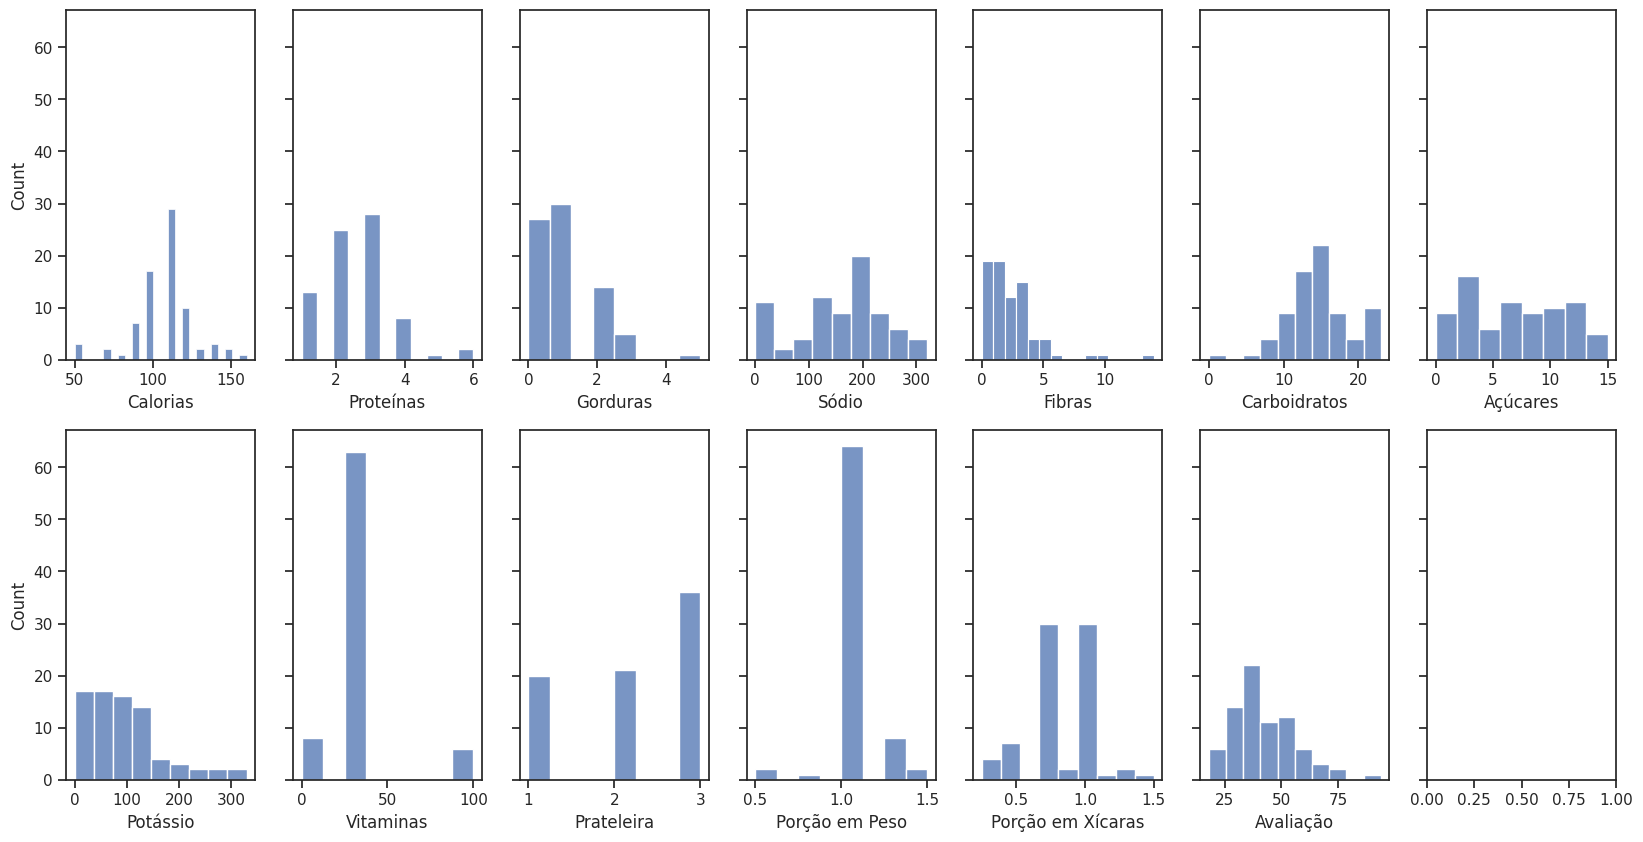

In [ ]:
#Distribuição das variáveis contínuas
n_cols = 7
n_rows = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,10), sharey=True)
for i, coluna in enumerate(colunas_numericas):
    sns.histplot(cereal[coluna],ax=axes[i//n_cols,i%n_cols]);

## Análise importante: verificação da normalidade da variável independente

<Axes: title={'center': 'Avaliação de Cereais'}>

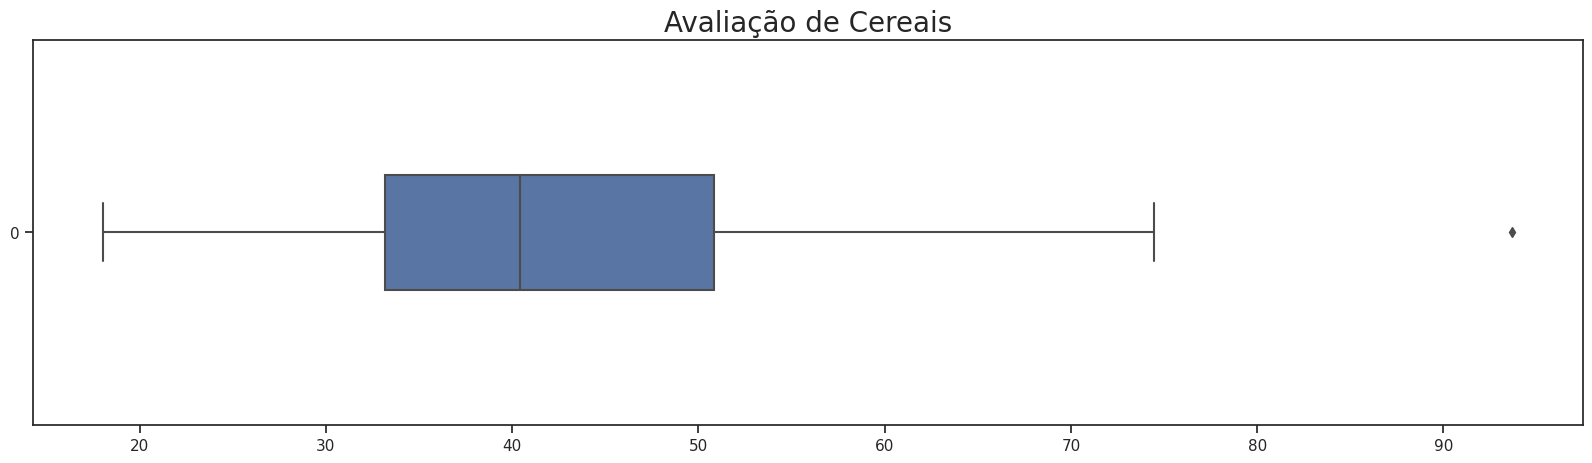

In [ ]:
#Boxplot do target
ax = sns.boxplot(data=cereal['Avaliação'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Avaliação de Cereais', fontsize=20)
ax

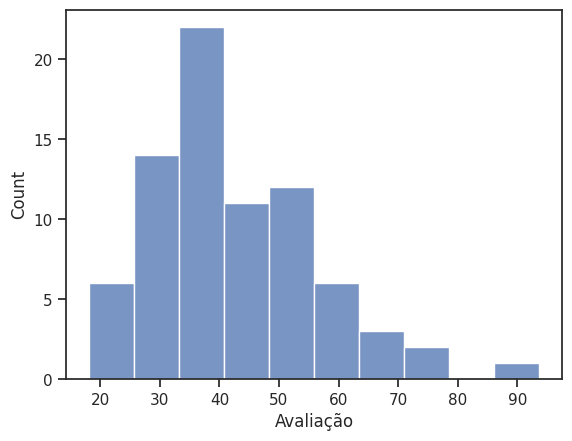

In [ ]:
sns.histplot(cereal['Avaliação'], bins=10);

Aparentemente os dados não seguem uma distribuição normal. Vamos confirmar com um teste estatístico:

In [ ]:
teste_normalidade(cereal['Avaliação'])

Estatística=0.953, p-valor=0.007
A amostra não parece ser normal (rejeitamos H0)


Uma vez que se confirma a grande possibilidade de os dados não seguirem a normal, podemos tentar resolver isso utilizando a transformação logarítimica:

Estatística=0.994, p-valor=0.983
A amostra parece ser normal (não podemos rejeitar H0)


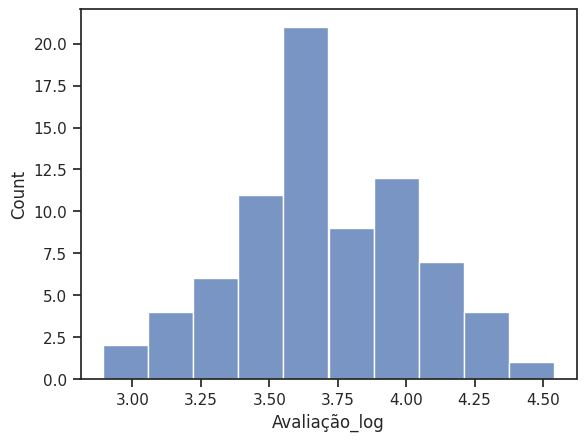

In [ ]:
cereal["Avaliação_log"] = np.log(cereal['Avaliação'])
teste_normalidade(cereal["Avaliação_log"])
sns.histplot(cereal['Avaliação_log'], bins=10);

**A partir desse ponto, Avaliação_log será nosso target.**

###Observações evidentes:

Não há dados ausentes

As médias e medianas dos atributos contínuos são similares

O atributo Porção em Xícaras pode ser resumido em um número menor de níveis. COMO?

Pode fazer sentido considerar apenas uma porção padrão e adaptar os valores de todos os atributos da tabela nutricional. No entanto, o valor que consta na tabela original, ainda que influenciado pelo tamanho da porção, pode afetar a avaliação. Solução? Investigar

Talvez os atributos contínuos possam fornecer mais informação se discretizados.

O atributo Tipo indica que a base tem raríssimos exemplos de cereais quentes (menos de 4%), o que indica que este atributo pode ser irrelevante para a extração de padrões.

O atributo Prateleira divide as instâncias de forma quase balanceada (quais as vantagens disso?).





###Correlação das variáveis

<ipython-input-50-44fcf330f3bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cereal.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


<Axes: >

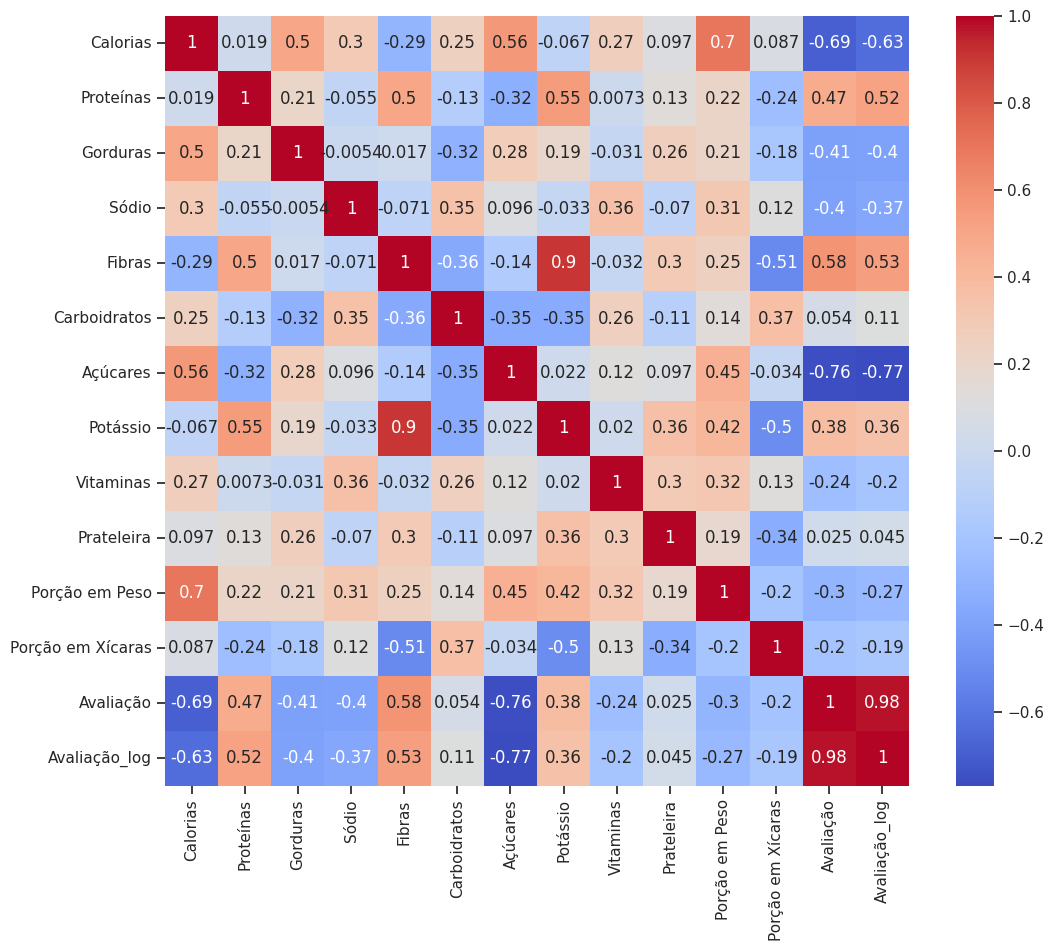

In [ ]:
ax = plt.subplots(figsize= (12, 10))
sns.heatmap(cereal.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
#correlação das variáveis com o target
cereal[cereal.columns].corr()['Avaliação_log'].sort_values()

<ipython-input-51-deed342a6c84>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cereal[cereal.columns].corr()['Avaliação_log'].sort_values()


Açúcares            -0.770153
Calorias            -0.632210
Gorduras            -0.400539
Sódio               -0.369901
Porção em Peso      -0.266191
Vitaminas           -0.198639
Porção em Xícaras   -0.186095
Prateleira           0.044553
Carboidratos         0.111843
Potássio             0.356760
Proteínas            0.519142
Fibras               0.533810
Avaliação            0.975493
Avaliação_log        1.000000
Name: Avaliação_log, dtype: float64

E notório que os atributos Calorias, Fibras e Açúcares são os mais correlacionados com o target (Avaliação)

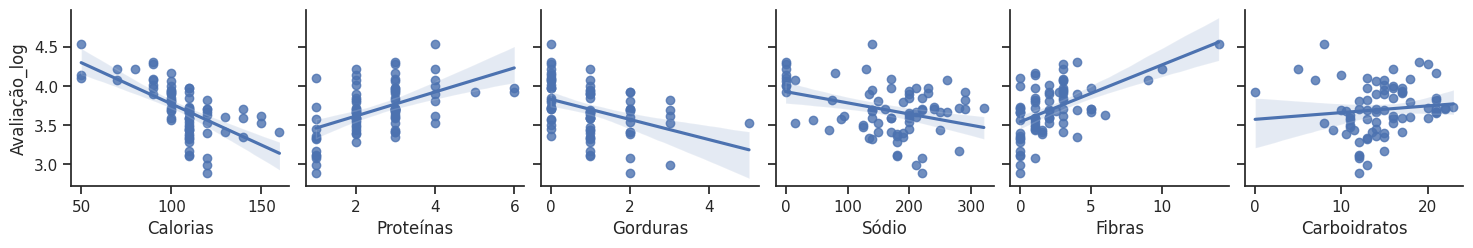

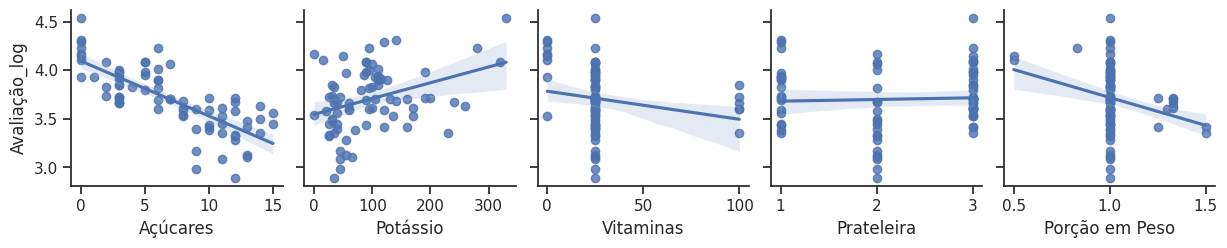

In [ ]:
sns.pairplot(data=cereal, y_vars=['Avaliação_log'], x_vars=colunas_numericas[:6], kind='reg')
sns.pairplot(data=cereal, y_vars=['Avaliação_log'], x_vars=colunas_numericas[6:-2], kind='reg')

#### É notório que os atributos Açúcares, Calorias, Fibras e Proteínas são os mais correlacionados com o target (**Avaliação_log**). Vamos destacá-los aqui

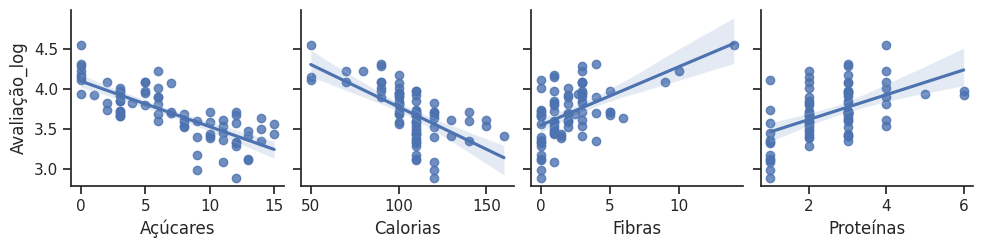

In [ ]:
#Destacando os atributos mais correlacionados com o target
sns.pairplot(cereal, y_vars='Avaliação_log', kind='reg',
                         x_vars=['Açúcares', 'Calorias', 'Fibras', 'Proteínas'])

## Regressão Linear Simples

In [ ]:
X = cereal[['Açúcares']]
y = cereal["Avaliação_log"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:          Avaliação_log   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           1.40e-14
Time:                        12:31:32   Log-Likelihood:                 12.943
No. Observations:                  61   AIC:                            -21.89
Df Residuals:                      59   BIC:                            -17.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1092      0.047     86.802      0.0

Com base no sumário acima, a fórmula do modelo de regressão gerado é:

$Avaliacao\_log = -0.0571 \times Acucares + 4.1092$

Contudo, antes afirmar qualquer coisa sobre essa função de regressão, precisamos validar o modelo gerado, ou seja, verificar se ele atende a todos os requisitos que indicam que de fato existe uma relação linear entre as variáveis analisadas.

###Principais análises que devem ser feitas aqui:

- R-squared: coeficiente de determinação do modelo. Quanto maior, melhor. Porém, é bom lembrar de que sempre que se adiciona um novo atributo, ele cresce. Se for comparar modelos com diferentes conjuntos de atributos, o ideal é utilizar o R2 ajustado como referência.;

- R-squared ajustado: R-squared penalizado pelo número de graus de liberdade. Quanto mais atributos irrelevantes se adiciona, pior;

- F-statistic: teste estatístico de significância global. Se a hipótese nula não for regeitada, isso significa que:

  -- Hipótese nula: o modelo gerado é estatisticamente equivalente ao modelo somente com o intercepto.

  -- Hipótese alternativa: o ajuste do modelo somente com intercepto é significativamente reduzido quando comparado ao seu modelo.

- Identificação dos coeficientes da regressão;

- Teste T: serve para verificar se os coeficientes gerados são estatisticamente diferentes de zero;

- Teste Omnibus e Jarque-Bera: os dois testes verificam se os resíduos seguem uma distribuição normal. A hipótese nula de ambos é de que os resíduos seguem a distribuição normal. Consequentemente, se p-valor <= 0,05 (caso o intervalo de confiança seja de 95%), rejeitamos a hipótese normalidade dos resíduos. Queremos aqui um p-valor > 0,5;

- Teste de Durbin-Watson: verifica se existe autocorrelação entre os resíduos. Valores próximos de 2 (geralmente de 1,5 a 2,5) indicam ausência de autocorrelação entre os resíduos. Valores abaixo de 2 indicam autocorrelação positiva, enquanto valores acima de 2 indicam autocorrelação negativa;

- AIC e BIC: são testes que ajudam definir o conjunto de preditores para o modelo. A grosso modo, ambos indicam se a inclusão ou remoção de um preditor é vantajosa para o modelo (quanto maior, pior).

###Análise de resíduos

Agora temos que verificar se os resíduos do modelo atendem aos pressupostos da regressão linear, a saber:

- Linearidade: A relação entre a variável independente e a variável dependente deve ser linear. Isso significa que a linha de regressão deve ser uma linha reta. Também é comum verificar linearidade a partir da relação da variável dependente e a variável predita. Principalmente em casos de regressão linear múltipla.

- Independência: Os resíduos devem ser independentes uns dos outros. Isso significa que não deve haver qualquer relação sistemática entre eles.

- Normalidade: Os resíduos devem seguir uma distribuição normal. Isso significa que a maioria dos resíduos deve estar próximos de zero e a distribuição dos resíduos deve ser simétrica em torno de zero.

- Homocedasticidade: Os resíduos devem ter a mesma variância em todos os níveis da variável independente. Em outras palavras, a variância dos resíduos deve ser constante em todas as partes do gráfico de dispersão. Assim como no critério de linearidade, em regressão linear múltipla é comum analisar a homocedasticiade a partir da relação entre a variável predita e os resíduos. Porém, também é possível realizar essa análise para cada variável independente em relação aos resíduos.


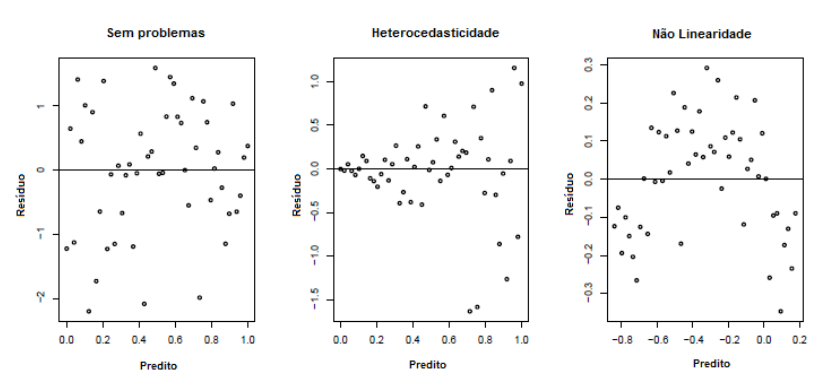

In [ ]:
#Calculando os resíduos
y_pred = modelo_statsmodels.predict(X_train_com_constante)
residuos = y_train - y_pred

In [ ]:
#outra forma
residuos = modelo_statsmodels.resid

In [ ]:
residuos

46    0.044922
15   -0.213512
45    0.049554
19   -0.009358
76   -0.063557
        ...   
5    -0.153316
9     0.152559
72   -0.271599
12   -0.608280
37   -0.122535
Length: 61, dtype: float64

####Linearidade

Text(0.5, 0, 'Açúcares')

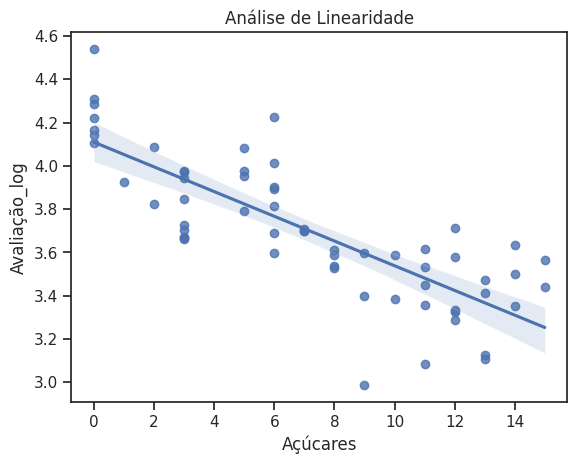

In [ ]:
ax = sns.regplot(x=X_train["Açúcares"], y=y_train)
ax.set_title("Análise de Linearidade")
plt.ylabel('Avaliação_log')
plt.xlabel('Açúcares')

####Independência:

Como pode ser visto no sumário do statsmodel, o teste de Durbin-Watson retornou um valor próximo de 2 (1,815), indicando que não há autocorrelação relevante entre os resíduos.

####Normalidade:

Os testes Omnibus e Jarque-Bera apresentados no sumário do statsmodel indicam que os resíduos seguem uma distribuição normal. Podemos também visualizar com um histograma:

<Axes: ylabel='Count'>

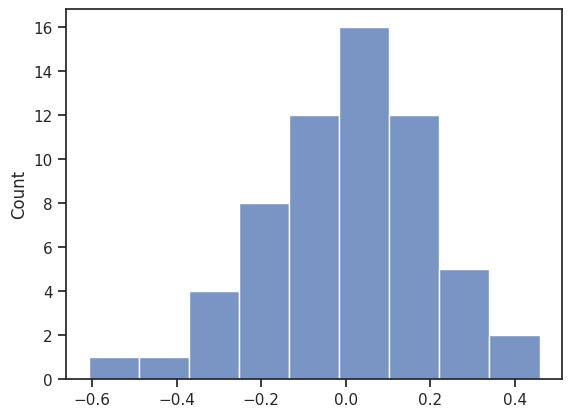

In [ ]:
sns.histplot(residuos)

####Homocedasticidade

Geralmente é medido por análise gráfica, mas também podemos utilizar testes estatísticos como o teste de Breusch-Pagan ou o teste de White. Em ambos os testes a hipótese nula é de que não há heterocedasticidade. Logo, se o p-valor for >0,05 (considerando um intervalo de confiança de 95%), os testes indicam homocedasticidade.

In [ ]:
# Teste de Breusch-Pagan para verificar homocedasticidade dos resíduos
_, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(residuos, modelo_statsmodels.model.exog)

# Teste de white
resultado_teste_white = smd.het_white(residuos, modelo_statsmodels.model.exog)

# Imprime o valor-p associado ao teste
print('Valor-p do teste de Breusch-Pagan:', p_value)
print('Valor-p do teste de White:', resultado_teste_white[1])

Valor-p do teste de Breusch-Pagan: 0.651036492185971
Valor-p do teste de White: 0.8819165230657074


Text(0.5, 0, 'Açúcares')

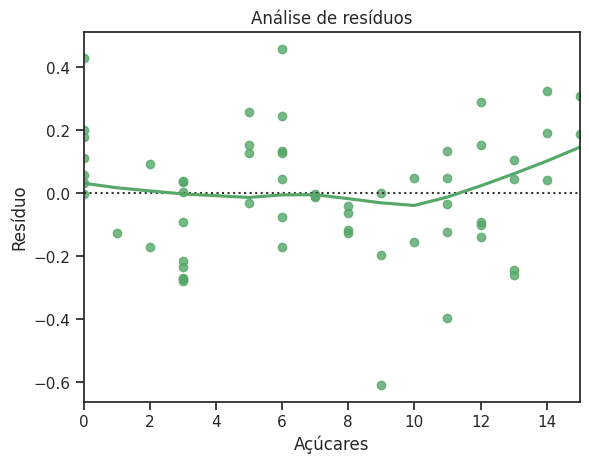

In [ ]:
ax_residual = sns.residplot(x=X_train["Açúcares"], y=residuos, lowess=True, color="g")
ax_residual.set_title("Análise de resíduos")
plt.ylabel('Resíduo')
plt.xlabel('Açúcares')

## Avaliação do modelo de regressão linear simples

Como pode-se observar com as análises realizadas até aqui, o modelo de regressão linar simples gerado passa em todas as exigências que a teoria exige para dar validade aos coeficientes informados. Contudo, nosso R2 indica que a reta de regressão encontrada explica apenas 63% da nossa variável independente. Assim sendo, cabe incluir mais variáveis a fim de verificar se conseguimos um modelo melhor.

#Regressão Linear Múltipla

In [ ]:
X = cereal.iloc[:,3:-2]
y = cereal["Avaliação_log"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels_multi_1 = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels_multi_1.summary())

                            OLS Regression Results                            
Dep. Variable:          Avaliação_log   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     137.6
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           6.92e-33
Time:                        11:28:54   Log-Likelihood:                 90.866
No. Observations:                  61   AIC:                            -155.7
Df Residuals:                      48   BIC:                            -128.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.8747      0.08

Vamos começar gerando um modelo com todas as nossas variáveis independentes para ver o resultado.

Apesar do R-squared elevado, é notório que existem alguns coeficientes cujo p-valor indica que eles não são estatísticamente diferentes de zero. Além disso, os testes estatísticos de Omnibus e Jarque-Bera indicam que os resíduos não seguem uma distribuição normal. Vamos olhar?

<Axes: ylabel='Count'>

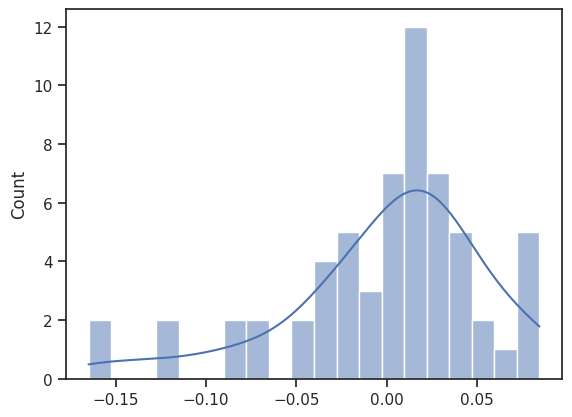

In [ ]:
sns.histplot(modelo_statsmodels_multi_1.resid, kde=True, bins=20)

Vamos gerar agora um modelo com todas as variáveis cuja correlação com o target seja superior a 0,3.

In [ ]:
X = cereal[["Açúcares", "Calorias", "Fibras", "Proteínas", "Gorduras", "Sódio", "Potássio"]]
y = cereal["Avaliação_log"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels_multi_2 = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels_multi_2.summary())

                            OLS Regression Results                            
Dep. Variable:          Avaliação_log   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     164.4
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           1.30e-33
Time:                        12:38:27   Log-Likelihood:                 77.340
No. Observations:                  61   AIC:                            -138.7
Df Residuals:                      53   BIC:                            -121.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9968      0.063     63.303      0.0

<Axes: ylabel='Count'>

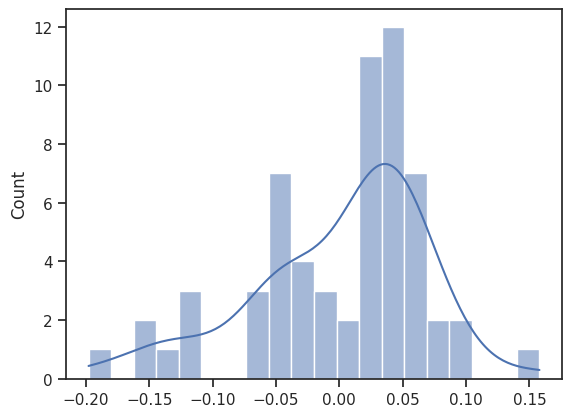

In [ ]:
sns.histplot(modelo_statsmodels_multi_2.resid, kde=True, bins=20)

Apesar do R² se manter num patamar similar, o R² ajustado e as métricas AIC e BIC indicam que o conjunto anterior adicionava complexidade aos dados, porém também trazia mais informação. No entanto, os dois modelos não são confiáveis, pois ambos possuem resíduos que não são normalmente distribuídos de acordo com os testes de Ombinus e Jarque-Bera.

O teste t indica que os coeficientes dos atributos Calorias e Potássio não são estatisticamente diferentes de 0, então vamos removê-los.

In [ ]:
X = cereal[["Açúcares", "Fibras", "Proteínas", "Gorduras", "Sódio"]]
y = cereal["Avaliação_log"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels_multi_3 = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels_multi_3.summary())

                            OLS Regression Results                            
Dep. Variable:          Avaliação_log   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     233.7
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           9.66e-36
Time:                        00:36:39   Log-Likelihood:                 76.703
No. Observations:                  61   AIC:                            -141.4
Df Residuals:                      55   BIC:                            -128.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9963      0.035    112.671      0.0

Nosso modelo melhorou. Tanto o R-squared ajustado quanto o AIC e BIC mostraram melhores resultados, indicando que a redução de complexidade foi benéfica. Além disso não temos mais variáveis cujo p-valor seja igual ou superior a 0.05.

O coeficiente da variável Sódio é muito baixo em relação às demais. Qual será o impacto ao removê-la?

In [ ]:
X = cereal[["Açúcares", "Fibras", "Proteínas", "Gorduras"]]
y = cereal["Avaliação_log"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels_multi_4 = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels_multi_4.summary())

                            OLS Regression Results                            
Dep. Variable:          Avaliação_log   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     101.6
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           5.52e-25
Time:                        00:37:52   Log-Likelihood:                 46.461
No. Observations:                  61   AIC:                            -82.92
Df Residuals:                      56   BIC:                            -72.37
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8527      0.052     73.535      0.0

O aprendizado foi notavelmente degradado. Podemos observar isso a partir da redução do R-squared ajustado, além do aumento considerável dos valores dos testes AIC e BIC. Assim sendo, vamos ficar com o modelo anterior e validar se ele atende aos critérios que confirmam a relação linear entre os dados.

In [ ]:
X = cereal[["Açúcares", "Fibras", "Proteínas", "Gorduras", "Sódio"]]
y = cereal["Avaliação_log"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_com_constante = sm.add_constant(X_train)

modelo = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          Avaliação_log   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     233.7
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           9.66e-36
Time:                        12:57:34   Log-Likelihood:                 76.703
No. Observations:                  61   AIC:                            -141.4
Df Residuals:                      55   BIC:                            -128.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9963      0.035    112.671      0.0

Apesar do modelo indicar um bom resultado, percebe-se que os testes Omnibus e Jarque-Bera apresentados no sumário do statsmodel estão conflitando. Enquanto o Jarque-Bera indica homocedasticidade, o Omnibus indica o contrário. Cabe aqui a visualização do gráfico de resíduos para apoiar a análise.

<Axes: ylabel='Count'>

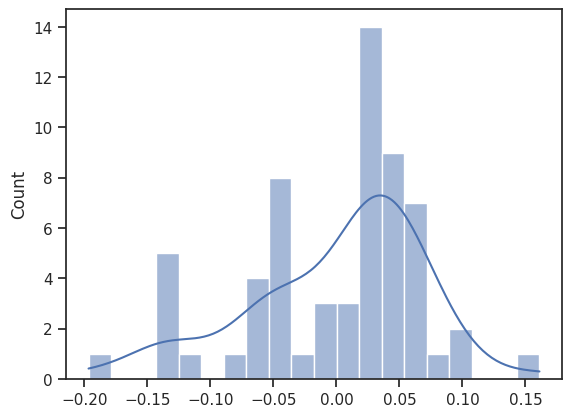

In [ ]:
sns.histplot(modelo.resid, kde=True, bins=20)

Analisando o gráfico fica evidente que os dados não seguem uma distribuição normal. Então o que fazer?

Uma solução possível é aplicar uma transformação logarítmica nas variáveis independentes para tentar reduzir a assimetria destas e ver como isso impacta no modelo.

<Axes: >

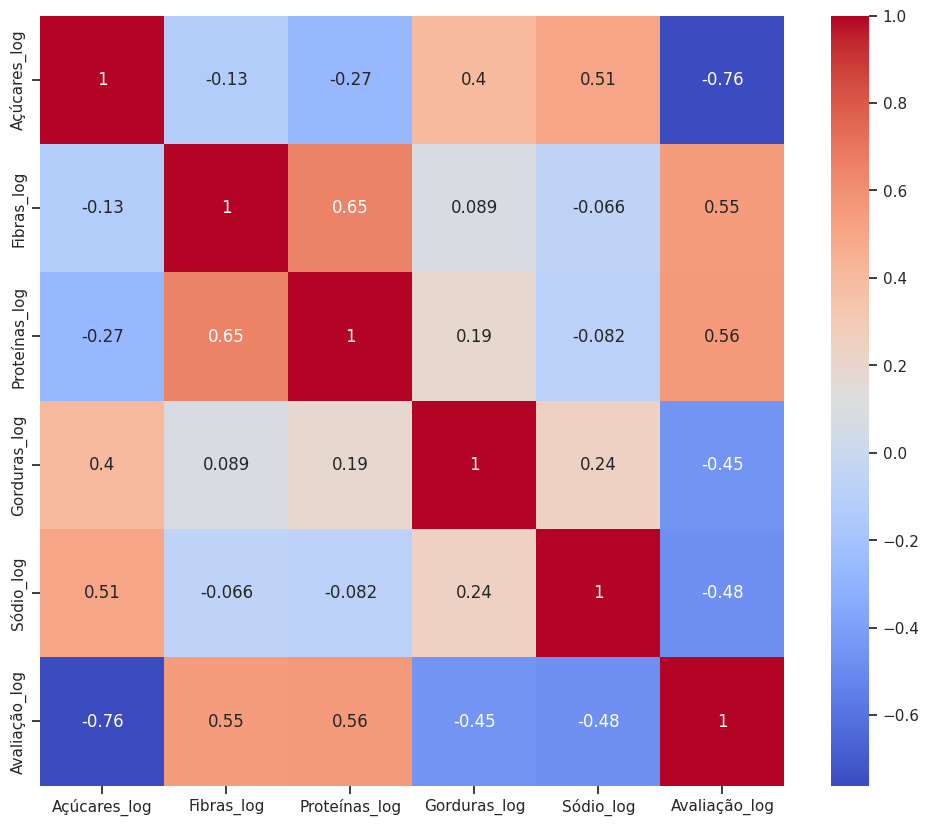

In [ ]:
#Como as variáveis podem ter valores zero e não existe log de zero, somamos 1
#a todos os valores antes da transformação logarítmica
cereal_log = np.log(cereal[["Açúcares", "Fibras", "Proteínas","Gorduras", "Sódio"]]+1)
cereal_log.columns = [col+"_log" for col in cereal_log.columns]
cereal_log = pd.concat([cereal_log, cereal["Avaliação_log"]], axis=1)
ax = plt.subplots(figsize= (12, 10))
sns.heatmap(cereal_log.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
#Correlação entre os preditores escolhidos antes da transformação e a variável target
cereal[["Açúcares", "Fibras", "Proteínas", "Gorduras",
        "Sódio", "Avaliação_log"]].corr().iloc[:,-1]

Açúcares        -0.770153
Fibras           0.533810
Proteínas        0.519142
Gorduras        -0.400539
Sódio           -0.369901
Avaliação_log    1.000000
Name: Avaliação_log, dtype: float64

In [ ]:
#Correlação entre os preditores transformados e a variável target
cereal_log.corr().iloc[:,-1]

Açúcares_log    -0.761628
Fibras_log       0.548405
Proteínas_log    0.558344
Gorduras_log    -0.452860
Sódio_log       -0.476462
Avaliação_log    1.000000
Name: Avaliação_log, dtype: float64

É perceptível que a correlação entre todas as variáveis com o target aumentou, o que é um ótimo sinal. Vamos ver como fica a regressão.

In [ ]:
X = cereal_log.iloc[:,:-1]
y = cereal_log["Avaliação_log"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_com_constante = sm.add_constant(X_train)

modelo_log = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_log.summary())

                            OLS Regression Results                            
Dep. Variable:          Avaliação_log   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           2.07e-27
Time:                        13:05:39   Log-Likelihood:                 55.350
No. Observations:                  61   AIC:                            -98.70
Df Residuals:                      55   BIC:                            -86.03
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.8099      0.076     50.234

In [ ]:
df_coeficientes = pd.DataFrame(data=modelo_log.params, index=["const"] + list(X_train.columns), columns=['Statsmodels'])
df_coeficientes

,Statsmodels
const,3.809941
Açúcares_log,-0.199780
Fibras_log,0.154897
Proteínas_log,0.270587
Gorduras_log,-0.192968
Sódio_log,-0.020917


Aparentemente o modelo atende a tudo o que precisamos, dado que:

- O R-squared está em um patamar elevado (0,909);
- A estatístca F indica que o modelo é estatísticamente diferente do modelo com apenas o intercepto;
- O p-valor dos coeficiente e do intercepto indicam que eles são estatísticamente diferentes de zero;
- O teste de Durbin-Watson indica que não temos autocorrelação entre os resíduos;
- Os testes Omnibus e Jarque-Bera concordam que os resíduos seguem uma distribuição normal.

Resta agora verificar a homocedasticidade dos resíduos.

Text(0.5, 0, 'Predito')

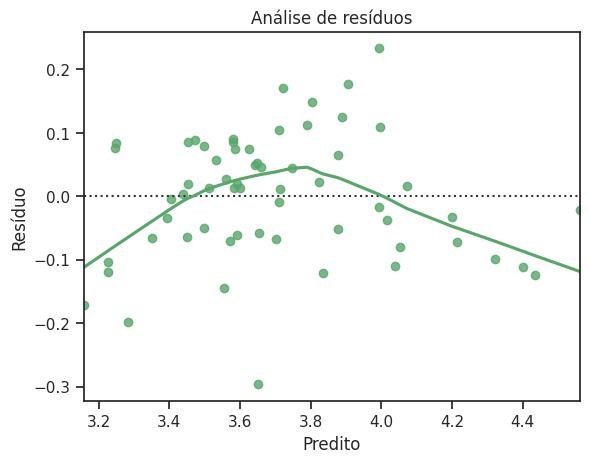

In [ ]:
ax_residual = sns.residplot(x=modelo_log.predict(), y=modelo_log.resid, lowess=True, color="g")
ax_residual.set_title("Análise de resíduos")
plt.ylabel('Resíduo')
plt.xlabel('Predito')

A partir do gráfico acima não se nota um padrão específico nos resíduos, mas também é possível perceber que os resíduos não estão tão uniformemente distribuídos ao redor de zero.

Para saber se essa variação observada está dentro do aceitável ou caracteriza uma heterocedasticidade, podemos aplicar os testes de White e o de Breusch-Pagan.

In [ ]:
# Teste de Breusch-Pagan para verificar homocedasticidade dos resíduos
_, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(modelo_log.resid, modelo_log.model.exog)

# Teste de white
resultado_teste_white = smd.het_white(modelo_log.resid, modelo_log.model.exog)

# Imprime o valor-p associado ao teste
print('Valor-p do teste de Breusch-Pagan:', p_value)
print('Valor-p do teste de White:', resultado_teste_white[1])


Valor-p do teste de Breusch-Pagan: 0.1725573923302997
Valor-p do teste de White: 0.12989945961535035


O p-valor dos dois testes foi superior a 0,05. Isso nos permite afirmar com pelo menos 95% de confiança que não há uma heterocedasticiade relevante nos resíduos.

Considerando que todos nosso modelo passou em todos os testes de validade, precisamos analisar agora como ele se comporta com os dados de teste. Para tanto, vamos falar um pouco sobre métricas de avaliação de performance de modelos de regressão.

## Avaliando performance de modelos de regressão

In [ ]:
#prevendo os valores do conjunto de teste e aplicando o exp para voltar à escala original
y_pred_exp = np.exp(modelo_log.predict(sm.add_constant(X_test)))
y_test_exp = np.exp(y_test)

### Mean Squared Error (MSE)

MSE é uma métrica de avaliação que mede a média das diferenças quadráticas entre os valores observados e previstos. Em outras palavras, o MSE nos diz quão preciso ou impreciso é nosso modelo de regressão linear - quanto menor o MSE, melhor o modelo é para prever valores.

![alt text](https://cdn-images-1.medium.com/max/800/0*gneJ93rtEyrZVfxC)

In [ ]:
mse = metrics.mean_squared_error(y_test_exp, y_pred_exp)
mse

48.89485962068686

Mas lembre, esse é o erro médio ao quadrado.

Para saber a margem de erro médio, usamos a métrica Root mean Squared Error (RMSE), que é a raíz quadrada do MSE

In [ ]:
from math import sqrt

rmse = round(sqrt(mse),2)
rmse

6.99

Tendo em vista que o atributo rating varia de 0-100, um erro médio de 6.99 é bom ou ruim?


###Mean Absolute Error (MAE)



![alt text](https://cdn-images-1.medium.com/max/800/0*XCZRQEl7E4vUdONe)

Por causa dos termos quadrados, maiores disparidades entre os valores reais e os previstos são “punidos” mais severamente pelo MSE do que pelo MAE. Ou seja, o MSE e o RMSE são mais sensíveis aos outliers do que o MAE.

Se decidirmos que os outliers em nosso conjunto de dados não são significativos na análise dos dados, podemos nos voltar para o MAE antes do MSE, pois os resíduos dos outliers não seriam exagerados a partir do quadrado dos resíduos. Vamos encontrar o MAE:

In [ ]:
mae = metrics.mean_absolute_error(y_test_exp, y_pred_exp)
round(mae,2)

5.1

## Previsão com sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X_train, y_train)
r2 = round(linear_model.score(X_train, y_train),3)
print("Coeficiente de determinação (R²): {}".format(r2))

Coeficiente de determinação (R²): 0.909


In [ ]:
coeficientes = linear_model.coef_
intercepto = linear_model.intercept_

df_coeficientes["SKLearn"] = np.append(intercepto, coeficientes)
df_coeficientes

,Statsmodels,SKLearn
const,3.809941,3.809941
Açúcares_log,-0.199780,-0.199780
Fibras_log,0.154897,0.154897
Proteínas_log,0.270587,0.270587
Gorduras_log,-0.192968,-0.192968
Sódio_log,-0.020917,-0.020917
